# Jordan Titanic Data Features
**Author:** Jordan  
**Date:** October 31, 2025 <br>
**Objective:** Predict the median house price in California using available housing features.


## Introduction
This project uses the California housing dataset to predict house prices based on features such as median income, average number of rooms, and house age. We'll clean the data, train a linear regression model, and explore ways to improve performance.

## Imports
We import the necessary Python libraries for this notebook.  

In [33]:
import matplotlib.pyplot as plt  # noqa: I001
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows
Load the Titanic dataset from seaborn.

In [34]:
# Load seaborns titanic dataset
titanic_df: pd.DataFrame = sns.load_dataset('titanic')  # noqa: Q000
# Display the first 10 rows of the dataset
titanic_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 Check for missing values and display summary statistics

We perform a preliminary inspection of our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

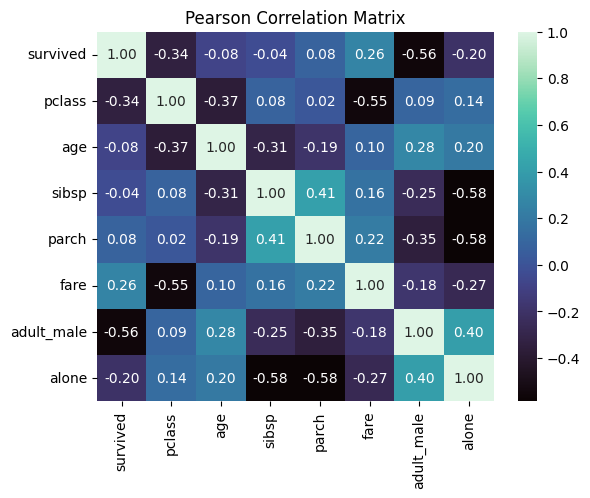

In [43]:
# Check data types and missing values
titanic_df.info()
# Summary statistics
display(titanic_df.describe())
# Check for missing values
display(titanic_df.isnull().sum())
# Check for correlations
sns.heatmap(titanic_df.corr(numeric_only=True), annot=True, cmap='mako', fmt='.2f')  # noqa: Q000
plt.title("Pearson Correlation Matrix")
plt.show()

### Reflection 1.2:
1) How many data instances are there?  There are 891 data instances in our dataset.
2) How many features are there?  There are 15 features in our dataset.
3) What are the names?  The names of the features are survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, and alone.
4) Are there any missing values?  Yes, there is a total of 869 missing values.
5) Are there any non-numeric features?  Yes, there are 9 non-numeric features.
6) Are the data instances sorted on any of the attributes?  The data instances do not appear to be sorted on any of the attributes.
7) What are the units of age?  The units of age is years.
8) What are the minimum, median and max age?  The minimum, medium and max ages are 0.42, 28 and 80 years respectively.
9) What two different features have the highest correlation?  The highest correlation of approximately 0.58 is obtained by both pairs parch and alone, and sibsp and alone.
10)  Are there any categorical features that might be useful for prediction?  The categorical features that might be useful for prediction are who, sex (who and sex could be combined into one feature), pclass (same info as class already in ordinal form), alone, and embarked. 

## Section 2. Visualize Feature Distributions
### 2.1 Create scatter matrix, scatter plot, histogram and count plot

We create a scatter matrix for the numeric attributes.

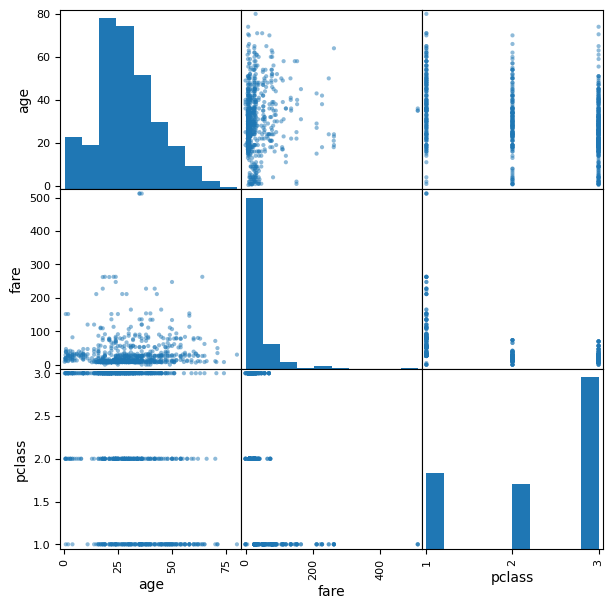

In [ ]:
attributes: list = ['age', 'fare', 'pclass']  # noqa: Q000
pd.plotting.scatter_matrix(titanic_df[attributes], figsize=(7,7));

We create a scatter plot of age vs fare, hued by gender.

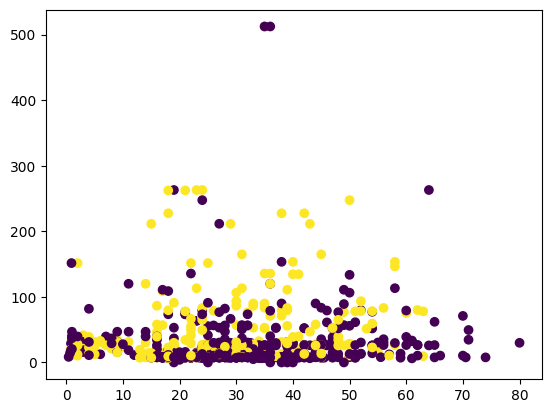

In [ ]:
plt.scatter(titanic_df['age'], titanic_df['fare'],  # noqa: Q000
            c=titanic_df['sex'].apply(lambda x: 0 if x == 'male' else 1));  # noqa: Q000

We create a histogram of age, with kernel density estimator.

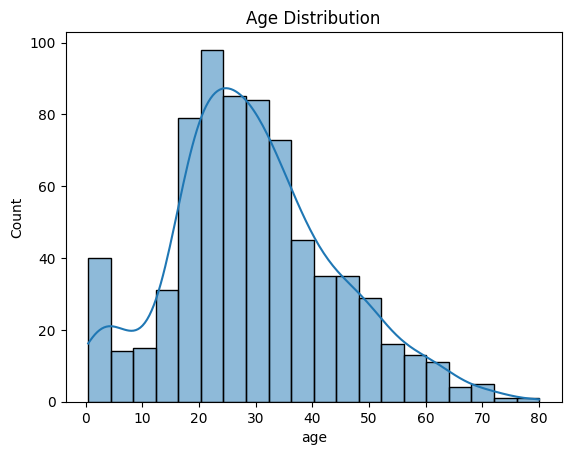

In [ ]:
sns.histplot(titanic_df['age'], kde=True) # type: ignore  # noqa: Q000
plt.title('Age Distribution')  # noqa: Q000
plt.show()

We create a count plot for the categorical features class and survival.

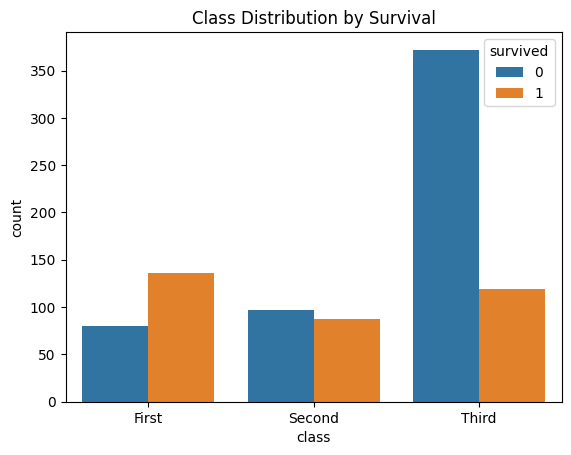

In [ ]:
sns.countplot(x='class', hue='survived', data=titanic)  # type: ignore # noqa: Q000
plt.title('Class Distribution by Survival')  # noqa: Q000
plt.show()

### Reflection 2.1:

1) What patterns or anomalies do you notice?
2) Do any features stand out as potential predictors?
3) Are there any visible class imbalances?

### 2.2 Handle Missing Values and Clean Data
Age had missing values. So, we impute missing values for age using the median.
Embark_town had missing values. So, we fill missing values for embark_town with the mode.

In [58]:
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())  # noqa: Q000
titanic_df['embark_town'] = titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0])  # noqa: Q000

### 2.3 Feature Engineering
We create a new feature, 'family_size'.  Then, we convert categorical data to numeric and create a binary feature for 'alone'.

In [ ]:
titanic_df['family_size'] = titanic_df['sibsp'] + titanic_df['parch'] + 1  # noqa: Q000
titanic_df['sex'] = titanic_df['sex'].map({'male': 0, 'female': 1})  # noqa: Q000
titanic_df['embarked'] = titanic_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # noqa: Q000
titanic_df['alone'] = titanic_df['alone'].astype(int)  # noqa: Q000

### Reflection 2.3

1) Why might family size be a useful feature for predicting survival?
2) Why convert categorical data to numeric?



## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target

- Select `MedInc` and `AveRooms` as predictors.
- Select `MedHouseVal` as the target variable.

In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame

In [65]:
features: list = ['MedInc', 'AveRooms']  # noqa: Q000
target: str = 'MedHouseVal'  # noqa: Q000
df_X: pd.DataFrame = data_frame[features]  # noqa: N816
df_y: pd.Series = data_frame[target]

Analysis:
1) Why did you choose these features? How might they impact predictions?
   <br><br>
   The features were selected to determine the strength of the linear realtionship between the target feature
   MedHouseVal and the predicting features MedInc and AveRooms. Using both MedInc and AveRooms as predicting features
   could introduce multicollinearity if they are correlated to one another; and hence impact the stability of our prediction model.

## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)

In [66]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.

In [67]:
# make an instance of the model and fit the data
model = LinearRegression()
model.fit(X_train, y_train);

Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.

In [68]:
# predict test y values
y_pred = model.predict(X_test)

### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.

In [69]:
# calculate and display coefficient of determination
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

R²: 0.46


Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.

In [70]:
# calculate and display mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 0.62


Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.

In [71]:
# calculate and display root mean squared error
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")

RMSE: 0.84


Analysis: 

1) How well did the model perform? Any surprises in the results?
   <br><br>With a score (coefficient of determination) of 0.46, we have that 46% of the variability in our target feature, MedHouseVal, is explained by our prediction model with AveBedrms and Averooms as prediction features.  With a MAE of 0.62, we have that the predictions of the model are off by an average of $62,000 (MedHouseVal is in $100,000 units).  The RMSE is 0.84, thus our models average prediction error is $84,000 (RSME gives larger errors more "weight" than MAE).  Our RSME value is significantly higher than our MAE, which suggests that our prediction model makes some more significant errors for some of our predictions. The difference between the MAE and RMSE suggest the possibility that a set of outliers could be impacting the accuracy of our model.  Both the moderate score value of 0.46, where 54% of the variability in our model is left unexplained, and RSME value significantly greater than our MAE value suggest that our model could potentially be underfitted.  Suggest introducing more features to the model to address the potential underfitting, and/or transforming outliers.
   


In [ ]:
titanic_corr: pd.DataFrame = titanic_df.corr(numeric_only=True)
eigenvalues: np.ndarray = np.abs(np.linalg.eigvals(titanic_corr))

sns.heatmap(titanic_corr, annot=True, cmap='mako', fmt='.2f')  # noqa: Q000

if eigenvalues.min() < 1e-10:
    plt.title("Pearson Correlation Matrix \n Warning: Condition Number Diverged!")
else:
    condition_number: float = eigenvalues.max() / eigenvalues.min()
    plt.title(f"Pearson Correlation Matrix \n Condition Number: {condition_number:.1f}")  # noqa: F541, Q000

plt.tight_layout()
plt.show()